In [1]:
import pandas as pd
import numpy as np
import json
import re
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
with open('../data/elixier_chemie_all.json', 'r')  as f:
    chemie_json = json.load(f)

In [3]:
chemie_json[0]

{'position': 9,
 'title': 'Eisensulfid - kostenloses Unterrichtsmaterial online bei Elixier',
 'description': 'Video zum entsprechenden Versuch.',
 'url': 'https://media.sodis.de/users/omega/PL_Videos/HR-Chemie_Eisensulfid_2015-11-12.mp4',
 'Höchstalter:': '16',
 'Mindestalter:': '10',
 'Bildungsebene:': 'Sekundarstufe I Sekundarstufe II',
 'Kostenpflichtig:': 'nein',
 'Lernressourcentyp:': 'Audiovisuelles Medium',
 'Lizenz:': 'Keine Angabe, es gilt die gesetzliche Reg',
 'Schlagwörter:': 'Eisensulfid',
 'Sprache:': 'de',
 'Themenbereich:': 'Schule mathematisch-naturwissenschaftliche Fächer Chemie',
 'Geeignet für:': 'Schüler',
 '_type': 'dict'}

In [19]:
!ls ../

build  elixier	 project.egg-info  requirements.txt  scrapy.cfg  venv
data   notebook  README.md	   scrapinghub.yml   setup.py


In [20]:
def get_domain(url):
    return re.match('https?://(.*?)(/|$).*', url).groups()[0]

pd.Series([get_domain(u['url']) for u in chemie_json]).value_counts().to_frame().reset_index().\
    rename(columns={'index': 'domain', 0: 'frequency'}).to_csv('../data/chemie_lor_domains.csv', index_label='id')

In [16]:
!head blah.csv

id,domain,frequency
0,www.lehrer-online.de,504
1,media.sodis.de,142
2,www.seilnacht.com,86
3,daten.didaktikchemie.uni-bayreuth.de,51
4,www.lingonetz.de,46
5,www.planet-schule.de,42
6,www.lncu.de,36
7,www.chemieunterricht.de,33
8,lernarchiv.bildung.hessen.de,33


In [184]:
for q in query_terms:
    if 'Daten' in q:
        print(q)

['Elementarteilchen', 'Nukleon', 'Photon', 'Proton', 'Daten', 'Neutron', 'Bild', 'Elektron']
['Daten', 'Bild', 'Stahl', 'Eisenerz', 'Erz']
['Schaubild', 'Daten', 'Destillieren', 'Bild']
['Salz', 'Ionenbindung', 'Daten', 'Bild', 'Schaubild']
['Salz', 'Ionengitter', 'Daten', 'Bild', 'Schaubild']
['Schaubild', 'Daten', 'Aggregatzustand', 'Bild']
['Steinkohle', 'Braunkohle', 'Daten', 'Kohlenstoff', 'Bild', 'Torf']
['Diamant', 'Ionengitter', 'Daten', 'Bild', 'Schaubild']
['Daten', 'Metall', 'Legierung', 'Tabelle']
['Schaubild', 'Daten', 'Metall', 'Bild']
['Quecksilber', 'Schmelztemperatur', 'Altertum', 'Zinn', 'Tabelle', 'Kupfer', 'Zink', 'Silber', 'Gold', 'Daten', 'Eisen', 'Blei', 'Metall']


In [175]:
def get_potential_query_terms(item):
    keywords = item.get('Schlagwörter:')
    description = item['description']
    title = item['title']
    query_terms = None
    if keywords:
        keyword_list = [k.replace(';', '') for k in keywords.split(' ')]
        prev=None
        keyphrase_list = []
        for k in keyword_list:
            if prev:
                keyphrase_list.append(' '.join([prev, k]))
            else:
                if k == 'Chemische':
                    prev = k
                else:
                    keyphrase_list.append(k)
        query_terms = list(set(keyphrase_list))
    else:
        nouns_in_title = [w for w in title.split(' ') if (len(w) > 0) and re.match('[A-Z]', w[0])]
        query_terms = nouns_in_title
    return query_terms
    

In [176]:
query_terms = [get_potential_query_terms(c) for c in chemie_json]

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(preprocessor=lambda x:x, tokenizer=lambda x:x).fit(query_terms)
query_counts = vectorizer.transform(query_terms)

/home/rsebastian/.anaconda3/envs/elixier/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [178]:
pd.Series(query_terms).apply(pd.Series).stack().value_counts().shape

(2412,)

In [179]:
all_query_terms_in_vocab_order = list(map(lambda x: x[0], 
                                          sorted([(k, v) for k, v in vectorizer.vocabulary_.items()], 
                                                 key=lambda x: x[1])))

In [180]:
[k for (k, v) in sorted(zip(
    all_query_terms_in_vocab_order,
    np.asarray(np.sum(query_counts, axis=0))[0]
), key=lambda x: x[1], reverse=True)]

['Unterrichtsmaterial',
 'Elixier',
 'Chemie',
 'Experiment',
 'Physik',
 'Anorganische',
 'Technologie',
 'Chemieunterricht',
 'Naturwissenschaften',
 'Verfahren',
 'Periodensystem',
 'Elemente',
 'Arbeitsblatt',
 'Versuch',
 'Laborarbeit',
 'der',
 'Lernmaterial',
 'Lernen',
 'Sekundarstufe',
 'Deutsch',
 'Sprachförderung',
 'Versuchsaufbau',
 'Fremdsprache',
 'Wasser',
 'Zweitsprache',
 'als',
 'Die',
 'Kalk',
 'Energie',
 'I',
 'Biologie',
 'Quantenphysik',
 'Erfahrungslernen',
 'II',
 'Metall',
 'Gruppenarbeit',
 'Salz',
 'Der',
 'Handreichung',
 'Mathematik',
 'Mechanik',
 'Technik',
 'Eisen',
 'Feuer',
 'Grafik',
 'Nachhaltigkeit',
 'Sauerstoff',
 'Luft',
 'Verbrennung',
 'Säure',
 'Teilchenmodell',
 'Atom',
 'Bildungsserver:',
 'Animation',
 'Film',
 'Hessischer',
 'Materialsammlung',
 'Unterricht',
 'Elektrochemie',
 'Licht',
 'Projekt',
 'Stromerzeugung',
 'Aggregatzustand',
 'Arbeitstechnik',
 'Ionenbindung',
 'Quiz',
 'Umwelt',
 'Bild',
 'Allgemeine',
 'Astronomie',
 'Base'

In [185]:
learning_material_type_terms = [
 'Unterrichtsmaterial',
 'Experiment',
 'Chemieunterricht',
 'Arbeitsblatt',
 'Laborarbeit',
 'Lernmaterial',
 'Erfahrungslernen',
 'Gruppenarbeit',
 'Handreichung',
 'Grafik',
 'Bild',
 'Film',
 'Unterricht', 
 'Animation',
 'Materialsammlung',
 'Daten',
 'Quiz',
 'Lernmodul',
 'Unterrichtsgestaltung',
 'Unterrichtsplanung',
 'Berufsausbildung',
 'Einführung'
 'Grundlagen',
 'Software',
 'Spiel',
 'Sprachbildung',
 'Foto',
 'Video',
 'Sachunterricht',
 'Schaubild'
 'Text',
 'Unterrichtseinheit',
 'Lehrmittel',
 'Übung',
 'Anfangsunterricht',
 'Beispiel',
 'Aufgaben',
 'Lernplattform',
 'Lernprogramm',
 'Lernsoftware',
 'Lernspiel',
 'Lexikon',
]
level_terms = [
 'Sekundarstufe',
 'Sekundarstufe I',
 'Sekundarstufe II',
 'Grundschule',
]
generic_terms = [
  'Chemie',
  'Organische',
  'Anorganische',
]
topic_terms = [
 'Periodensystem',
 'Kalk',
 'Energie',
 'Metall',
 'Salz',
 'Eisen',
 'Feuer',
 'Nachhaltigkeit',
 'Sauerstoff',
 'Luft',
 'Verbrennung',
 'Säure',
 'Bindung',
 'Teilchenmodell',
 'Atom',
 'Elektrochemie',
 'Licht',
 'Stromerzeugung',
 'Aggregatzustand',
 'Arbeitstechnik',
 'Ionenbindung',
 'Molekül',
 'Umwelt',
 'Astronomie',
 'Base',
 'Optik',
 'Relativitätstheorie',
 'Elektrizität',
 'Nahrung',
 'Gleichgewicht',
 'Halbleiterphysik',
 'Kunststoff',
 'Lebensmittel',
 'Umweltschutz',
 'Zucker',
 'Korrosion',
 'Magnesium',
 'Sternhimmel',
 'Temperatur',
 'Treibhauseffekt',
 'Gesundheit',
 'Kohlensäure',
 'Ozean',
 'Rakete',
 'Stickstoff',
 'Trinkwasser',
 'Destillieren',
 'Erneuerbare',
 'Gewicht',
 'Klimawandel',
 'Luftdruck',
 'Magnetismus',
 'Meer',
 'Radioaktivität',
 'Reaktion',
 'Wasserstoff',
 'Zeitschrift',
 'Ökologie',
 'Atommodell',
 'Enzym',
 'Ernährung',
 'Forschung',
 'Gold',
 'Ionengitter',
 'Klima',
 'Kristall',
 'Löslichkeit',
 'Nahrungsmittel',
 'Oxidation',
 'Papier',
 'Planet',
 'Sonne',
 'Stahl',
 'Titration',
 'Weltall',
 'Wärmelehre',
 'Atmosphäre',
 'Atombau',
 'Aufbau',
 'Bildung',
 'Eisenerz',
 'Energieumwandlung',
 'Flamme',
 'Gestein',
 'Gravitation',
 'Katalysator',
 'Kohlenstoff',
 'Meeresforschung',
 'Mond',
 'Natur',
 'Naturgesetz',
 'Recycling',
 'Roboter',
 'Salzsäure',
 'Schwerkraft',
 'Thermodynamik',
 'Universum',
 'Wechselstrom',
 'Wissenschaft',
 'Zink',
 'Aerodynamik',
 'Alkohol',
 'Brennstoffzelle',
 'Düngemittel',
 'Elektron',
 'Energiegewinnung',
 'Ethanol',
 'Farbe',
 'Geographie',
 'Geschwindigkeit',
 'Gewässer',
 'Handy',
 'Hefe',
 'Internet',
 'Kosmetik',
 'Kunst',
 'Kupfer',
 'Labor',
 'Lauge',
 'Legierung',
 'Lösung',
 'Musik',
 'Natrium',
 'Oberflächenspannung',
 'Protein',
 'Reaktionskinetik',
 'Salzwasser',
 'Schwefel',
 'Schwefelsäure',
 'Seife',
 'Simulation',
 'Spektrum',
 'Strom',
 'Aminosäure',
 'Atomhülle',
 'Atomkern',
 'Batterie',
 'Biene',
 'Biodiversität',
 'Calciumcarbonat',
 'Doline',
 'Energien',
 'Essigsäure',
 'Flüssigkeit',
 'Fotosynthese',
 'Gefahrstoff',
 'Gemisch',
 'Genetik',
 'Gewitter',
 'Glas',
 'Helium',
 'Holzkohle',
 'Indikator',
 'Kernphysik',
 'Kinetik',
 'Kohlendioxid',
 'Lichtbrechung',
 'Lichtstrahl',
 'Lithium',
 'Mars',
 'Medien',
 'Messung',
 'Mikrogravitation',
 'Mikroorganismus',
 'Nahrungskette',
 'Schulen',
 'Schwerelosigkeit',
 'Silber',
 'Smartphone',
 'Solarenergie',
 'Sport',
 'Studium',
 'Stöchiometrie',
 'Synthese',
 'Trennverfahren',
 'Wasserversorgung',
 'Wasserwirtschaft',
 'Weltraum',
 'Wortschatzarbeit',
 'Zentrifugieren',
 'Akustik',
 'Aluminium',
 'Ammoniak',
 'Astro',
 'Astronaut',
 'Atomphysik',
 'Aufgaben',
 'Auflösung',
 'Beispiele',
 'Berufswahl',
 'Beton',
 'Beugung',
 'Biber',
 'Bilder',
 'Bildungssprache',
 'Bionik',
 'Blut',
 'Bunsenbrenner',
 'Destillation',
 'Dynamo',
 'Elektrolyse',
 'Elektromagnet',
 'Elektronenübertragung',
 'Element',
 'Energieerzeugung',
 'Energiesparen',
 'Energieversorgung',
 'Entdeckung',
 'Enthalpie',
 'Entwicklung',
 'Erde',
 'Erklärung',
 'Fachdidaktik',
 'Fett',
 'Feuerwehr',
 'Fisch',
 'Fliehkraft',
 'Gas',
 'Generator',
 'Geräusch',
 'Gesundheitserziehung',
 'Gewässerschutz',
 'Gezeiten',
 'Halbwertszeit',
 'Herstellung',
 'Hitze',
 'Hochofen',
 'Hygiene',
 'Interaktive',
 'Interferenz',
 'Klimaschutz',
 'LEDs',
 'Landwirtschaft',
 'Leitfähigkeit',
 'Lichtquelle',
 'Löcher',
]

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
!wget https://int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com/vocab.txt

--2022-07-26 04:59:03--  https://int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com/vocab.txt
Resolving int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com (int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com)... 52.219.171.26
Connecting to int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com (int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com)|52.219.171.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15186188 (14M) [text/plain]
Saving to: ‘vocab.txt’

vocab.txt            37%[======>             ]   5.49M   242KB/s    eta 38s    ^C


In [144]:
!wget https://int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com/vectors.txt

--2022-07-26 04:56:31--  https://int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com/vectors.txt
Resolving int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com (int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com)... 52.219.46.20
Connecting to int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com (int-emb-word2vec-de-wiki.s3.eu-central-1.amazonaws.com)|52.219.46.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2419180494 (2.3G) [text/plain]
Saving to: ‘vectors.txt’

vectors.txt           1%[                    ]  30.54M   242KB/s    eta 3h 7m  ^C


In [143]:
!pip install gensim

     |████████████████████████████████| 24.1 MB 97 kB/s eta 0:00:012
     |████████████████████████████████| 58 kB 113 kB/s ta 0:00:011


In [ ]:
import gensim.downloader

In [139]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda x:x,
    preprocessor=lambda x:x,
    token_pattern=None)
query_tfidf = np.asarray(tfidf.fit_transform(query_terms).todense())

In [142]:
vectorizer.vocabulary_

AttributeError: 'TfidfVectorizer' object has no attribute 'vocabulary_'

In [136]:
def generate_wordclouds(X, in_X_tfidf, k, in_word_positions):

    # Clustering
    in_model = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
    in_y_pred = in_model.fit_predict(X)
    in_cluster_ids = set(in_y_pred)
    silhouette_avg = silhouette_score(X, in_y_pred)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    # Number of words with highest tfidf score to display
    top_count = 100

    for in_cluster_id in in_cluster_ids:
        # compute the total tfidf for each term in the cluster
        in_tfidf = in_X_tfidf[in_y_pred == in_cluster_id]
        # numpy.matrix
        tfidf_sum = np.sum(in_tfidf, axis=0)
        # numpy.array of shape (1, X.shape[1])
        tfidf_sum = np.asarray(tfidf_sum).reshape(-1)
        top_indices = tfidf_sum.argsort()[-top_count:]
        term_weights = {in_word_positions[in_idx]: tfidf_sum[in_idx] for in_idx in top_indices}
        wc = WordCloud(width=1200, height=800, background_color="white")
        wordcloud = wc.generate_from_frequencies(term_weights)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Cluster {in_cluster_id}")
        plt.show()

    return in_cluster_ids



In [138]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, random_state=42)
X_svd = svd.fit_transform(query_tfidf)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")
word_positions = {v: k for k, v in vectorizer.vocabulary.items()}
cluster_ids = generate_wordclouds(X_svd, X_tfidf, 2, word_positions)

Total variance explained: 0.25


AttributeError: 'NoneType' object has no attribute 'items'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.73s/it]


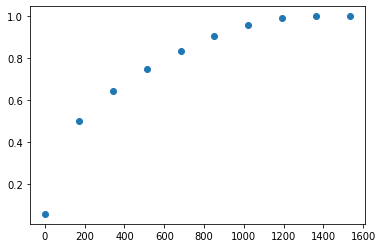

In [126]:
x = []
y= []

top = 1700
n_steps = 10
space = range(2, top, top//n_steps)
for c in tqdm(space, total=len(space)):
    pca = PCA(n_components=c)
    pca.fit(query_tfidf)
    x.append(c)
    y.append(np.sum(pca.explained_variance_ratio_))
plt.scatter(x, y)

In [130]:
pca.explained_variance_

array([3.50288284e-02, 2.27764344e-02, 1.79168609e-02, ...,
       2.68953802e-34, 2.68706110e-34, 2.68463701e-34])

In [83]:
pd.Series(query_terms).apply(pd.Series).stack().value_counts()

Unterrichtsmaterial    653
Elixier                635
Chemie                 352
Experiment             316
Physik                 130
                      ... 
Elektromotor             1
Galvanisches             1
Energiespeicherung       1
Mittelgebirge            1
Energiewirtschaft        1
Length: 2390, dtype: int64

In [70]:
import yake
kw_extractor = yake.KeywordExtractor()

def yake_kws(text):
    return kw_extractor.extract_keywords(text)


In [72]:
yake_kws('Video zum entsprechenden Versuch.')

[('zum entsprechenden Versuch', 0.008680855907871378),
 ('Video zum entsprechenden', 0.01655915082773619),
 ('entsprechenden Versuch', 0.026233073037508336),
 ('Video zum', 0.04940384002065631),
 ('Versuch', 0.08596317751626563),
 ('zum entsprechenden', 0.09700399286574239),
 ('Video', 0.15831692877998726),
 ('zum', 0.29736558256021506),
 ('entsprechenden', 0.29736558256021506)]

In [55]:
[c['description'] for c in chemie_json]

['Video zum entsprechenden Versuch.',
 'Die Videos und Materialien aus der Reihe CH@PH sind im Rahmen eines Weiterbildungslehrganges des Pädagogischen Landesinstituts Rheinland-Pfalz für fachfremd unterrichtende Lehrkräfte entstanden. Die Experimente haben alle einen Bezug zum Alltag und können einfach vorbereitet und durchgeführt werden. Das Material entstand in Kooperation der Chemieverbände mit BASF-Mitarbeitern und Lehrern aus zehn Gymnasien.',
 'Filmsequenz. Die Videos und Materialien aus der Reihe CH@PH sind im Rahmen eines Weiterbildungslehrganges des Pädagogischen Landesinstituts Rheinland-Pfalz für fachfremd unterrichtende Lehrkräfte entstanden. Die Experimente haben alle einen Bezug zum Alltag und können einfach vorbereitet und durchgeführt werden. Das Material entstand in Kooperation der Chemieverbände mit BASF-Mitarbeitern und Lehrern aus zehn Gymnasien.',
 'How do strong and weak acids differ? Use lab tools on your computer to find out! Dip the paper or the probe into solu

In [50]:
domains = pd.Series([(re.findall('//(.*?)(/|$)', j['url'])[0][0]) for j in chemie_json]).value_counts()
(x.cumsum() / x.sum()).iloc[:20]

www.lehrer-online.de                    0.286039
media.sodis.de                          0.366629
www.seilnacht.com                       0.415437
daten.didaktikchemie.uni-bayreuth.de    0.444381
www.lingonetz.de                        0.470488
www.planet-schule.de                    0.494325
www.lncu.de                             0.514756
www.chemieunterricht.de                 0.533485
lernarchiv.bildung.hessen.de            0.552213
www.zum.de                              0.570375
de.wikipedia.org                        0.587401
static.bildung-rp.de                    0.602724
www.komm-mach-mint.de                   0.616345
www.chemie-master.de                    0.628263
www.schule-bw.de                        0.639614
educ.ethz.ch                            0.650397
online-media.uni-marburg.de             0.659478
www.zauberhafte-physik.net              0.668558
www.ltam.lu                             0.677639
www.wissenschaftsjahr.de                0.686152
dtype: float64

In [49]:
x.iloc[:25]

www.lehrer-online.de                    504
media.sodis.de                          142
www.seilnacht.com                        86
daten.didaktikchemie.uni-bayreuth.de     51
www.lingonetz.de                         46
www.planet-schule.de                     42
www.lncu.de                              36
www.chemieunterricht.de                  33
lernarchiv.bildung.hessen.de             33
www.zum.de                               32
de.wikipedia.org                         30
static.bildung-rp.de                     27
www.komm-mach-mint.de                    24
www.chemie-master.de                     21
www.schule-bw.de                         20
educ.ethz.ch                             19
online-media.uni-marburg.de              16
www.zauberhafte-physik.net               16
www.ltam.lu                              16
www.wissenschaftsjahr.de                 15
www.supra-lernplattform.de               14
www.bautschweb.de                        12
sodis.de                        